# Arbitrary Linear Transformation

This model shows that any linear transformation between ensembles can be easily computed
by selecting an appropriate value for the "transform". It provides an example of
computing linear transformations using vector representations.

Network diagram:

      [Input - 2D] ---> (x - 2D) ---> (z - 3D)

A two-dimensional input signal is first fed into a two-dimensional neuronal ensemble
`ens_X`
, which then projects it on to another three-dimensional ensemble `ens_Z`.

In [1]:
# Setup the environment
import nengo

## Create the Model

This model contains the parameters as described in the book. Setting the `transform`
argument of the connection
to be the `weight_matrix` is analogous to entering the weights in the "2 to 3 Coupling
Matrix" window in Nengo 1.4 GUI as described in the book.

In [2]:
# Create the network object to which we can add ensembles, connections, etc.
model = nengo.Network(label="Arbitrary Linear Transformation")

with model:
    # Two-dimensional input signal with constant value of [0.5, -0.5]
    stim = nengo.Node([0.5, -0.5], label="Input")

    # 2 and 3-dimensional ensembles each with 200 LIF neurons
    ens_X = nengo.Ensemble(200, dimensions=2, label="X")
    ens_Z = nengo.Ensemble(200, dimensions=3, label="Z")

    # Connect the input to ensemble x
    nengo.Connection(stim, ens_X)

    # Connect ensemble x to ensemble z using a weight matrix
    weight_matrix = [[0.0, 1.0], [1.0, 0.0], [0.5, 0.5]]
    nengo.Connection(ens_X, ens_Z, transform=weight_matrix)

## Run the Model

In [ ]:
# Import the nengo_gui visualizer to run and visualize the model.
from nengo_gui.ipython import IPythonViz

IPythonViz(model, "ch3-arbitrary-linear.py.cfg")

Press the play button in the visualizer to run the simulation. You should see the graphs
as shown in the figure below.

The graphs show a two-dimesional input linearly projected on to a two-dimensional
ensemble of neurons (`x`), which further linearly projects it on to a three-dimesional
neuronal ensemble (`z`). You can use the sliders to change the input values provided by
the input node.

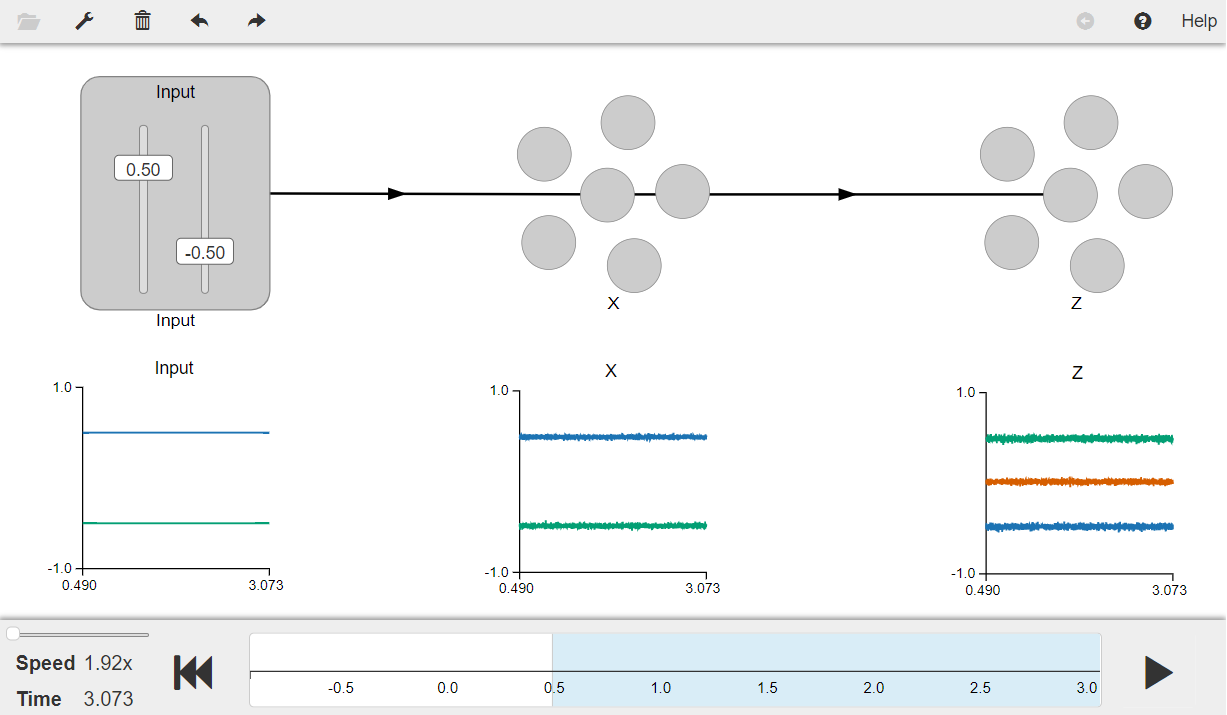

In [3]:
from IPython.display import Image

Image(filename="ch3-arbitrary-linear.png")